In [2]:
import numpy as np
import roadrunner
import pandas as pd
import matplotlib.pyplot as plt

SEED=1
np.random.seed(seed=SEED)

# Model system parameters
MODEL_SBML_FILE = "model_Neg_Feed_Oscillate.xml"
DURATION = 36

# Synthetic dataset parameters
NOISE = 0.02 # % Gaussian noise (range is 0-1)
N_PTS = DURATION * 1000 + 1
T_PTS = np.arange(0,37,6).astype(float)
SPEC_NAMES = ["XT", "YP", "RP"]

In [3]:
def gaussian_noise(x,std,mu=0):
	noise = np.random.normal(mu, std, size = x.shape)
	x_noisy = x + noise
	return x_noisy

rr = roadrunner.RoadRunner(MODEL_SBML_FILE)
rr.integrator.absolute_tolerance = 5e-10
rr.integrator.relative_tolerance = 1e-8

rr.resetAll()
res = rr.simulate(times=T_PTS)
print(res)
xt = res[:, 1]
yt = res[:, 3] 
rt = res[:, 5]
print(xt, yt,rt)

    time,     [S1],     [S2],      [S3],     [S4],       [S5]
 [[    0,        0,        1,         0,        1,          0],
  [    6,  4.18857,  0.31944,   0.68056, 0.963318,  0.0366822],
  [   12, 0.518886, 0.586678,  0.413322, 0.807346,   0.192654],
  [   18,  2.14932, 0.955096, 0.0449036, 0.995799, 0.00420113],
  [   24,  1.71691, 0.127892,  0.872108, 0.881496,   0.118504],
  [   30, 0.615148, 0.885334,  0.114666, 0.854909,   0.145091],
  [   36,  3.99267, 0.683714,  0.316286, 0.991534,  0.0084664]]

[0.         4.18856501 0.51888593 2.14931529 1.71690663 0.6151478
 3.99267405] [0.         0.68055992 0.41332237 0.04490364 0.87210806 0.11466617
 0.31628631] [0.         0.03668218 0.19265367 0.00420113 0.11850415 0.14509057
 0.0084664 ]


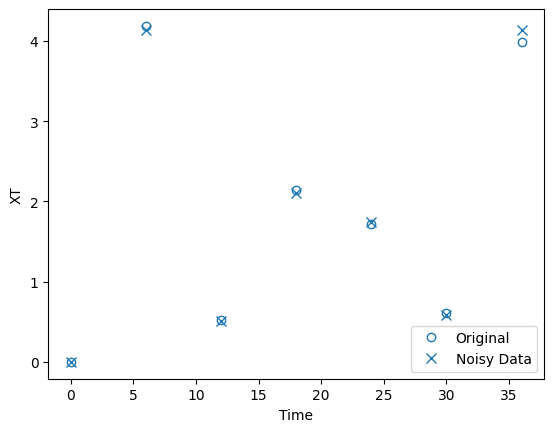

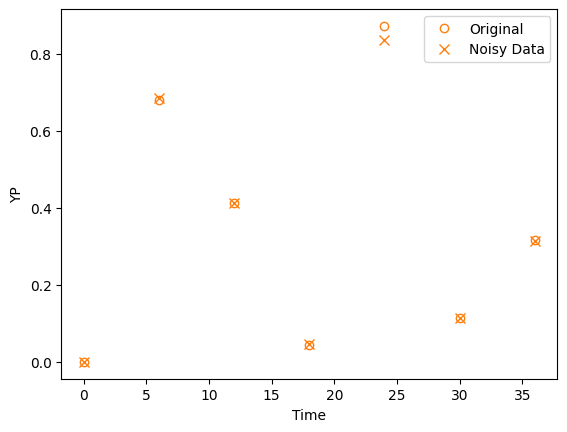

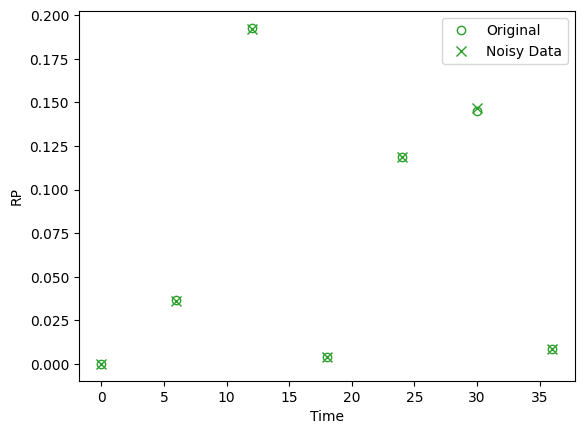

In [4]:
ts_data = res[:, 0]
dfs = []
import seaborn as sns
c = sns.color_palette("tab10", n_colors=3)

for i, traj, in enumerate([xt,yt,rt]):
	spec_name = f"observable_{SPEC_NAMES[i]}"
	
	std = NOISE * traj
	noisy_data = gaussian_noise(traj, std)
	
	N_DATA = len(T_PTS)
	# Save for later
	df = pd.DataFrame()

	df["observableId"] = [spec_name] * N_DATA
	df["simulationConditionId"] = ["simCondition"] * N_DATA
	df["measurement"] = noisy_data
	df["time"] = T_PTS
	dfs.append(df)

	plt.figure(dpi=100)
	plt.plot(ts_data, traj, 'o', markeredgecolor=c[i], markerfacecolor="none", lw=1, label="Original")
	plt.plot(T_PTS, noisy_data, 'x', markersize=7, color=c[i], label="Noisy Data")
	plt.legend()
	plt.xlabel("Time");
	plt.ylabel(SPEC_NAMES[i]);

In [4]:
all_df = pd.concat(dfs, axis=0)
all_df.to_csv("measurementData_Neg_Feed_Oscillate.tsv", sep="\t", index=False)
all_df

,observableId,simulationConditionId,measurement,time
0,observable_XT,simCondition,0.000000,0.0
1,observable_XT,simCondition,4.137317,6.0
2,observable_XT,simCondition,0.513405,12.0
3,observable_XT,simCondition,2.103192,18.0
4,observable_XT,simCondition,1.746623,24.0
5,observable_XT,simCondition,0.586832,30.0
6,observable_XT,simCondition,4.132003,36.0
0,observable_YP,simCondition,0.000000,0.0
1,observable_YP,simCondition,0.684902,6.0
2,observable_YP,simCondition,0.411261,12.0


In [5]:
!petablint ./Neg_Feed_Oscillate.yaml

/home/larkinit/anaconda3/envs/test1/lib/python3.12/site-packages/petab/v2/__init__.py:12: UserWarning: Support for PEtab2.0 and all of petab.v2 is experimental and subject to changes!
  warn(
